In [72]:
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader

In [73]:
GoogleDriveDownloader.download_file_from_google_drive(file_id='1tU_MRukrg3D2iZFZ-tk4oj6MfV4o7q4u',
                                                      dest_path='./rilevazioni.csv', overwrite=True)

In [0]:
import os
import requests
import pandas as pd
import random
import numpy as np

In [75]:
rilevazioni = pd.read_csv('rilevazioni.csv').set_index(['Regione','Citta'])
rilevazioni.iloc[:,-10:]

08-04  09-04  10-04  ...  15-04  16-04  17-04
Regione   Citta                                 ...                     
LOMBARDIA BERGAMO           9931  10043  10151  ...  10472  10518  10590
          BRESCIA           9909  10122  10369  ...  11187  11355  11567
          COMO              1542   1605   1686  ...   2154   2233   2285
          CREMONA           4422   4489   4562  ...   5202   5273   5313
          LECCO             1755   1805   1838  ...   1982   1986   2005
...                          ...    ...    ...  ...    ...    ...    ...
CALABRIA  COSENZA            266    275    289  ...    318    357    367
          REGGIO CALABRIA    248    250    256  ...    276    269    240
          CATANZARO          169    173    176  ...    190    194    195
          VIBO VALENTIA       61     61     65  ...     68     70     70
          CROTONE            113    113    113  ...    117    117    117

[108 rows x 10 columns]

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

def plot_annotate(df, title='', xdelta=0, ydelta=10, figsize=(17, 7)):
  
  ax = df.T.plot(figsize=figsize, title=title)
  ax.set_xticks(ticks=np.arange(0, len(df.columns) , step=2))
  tick_label = list(df.columns)[::2]
  ax.set_xticklabels(tick_label)

  for k, v in zip(np.arange(len(df.columns)), df.T.iterrows()):
    for el in v[1]:
      ax.annotate(el, (k + xdelta, el + ydelta))
  return ax

In [0]:
sorted_by_infections = rilevazioni.loc[rilevazioni.sort_values(by=[rilevazioni.columns[-1]],ascending=False).index]

In [0]:
crescita = pd.DataFrame(index=sorted_by_infections.index)

In [0]:
for ieri, oggi in zip(sorted_by_infections.columns[:-1], sorted_by_infections.columns[1:]):
  crescita[oggi] = sorted_by_infections[oggi] - sorted_by_infections[ieri]

In [80]:
display(crescita.head(3))
sorted_by_infections.head(3)

09-03  10-03  11-03  12-03  ...  14-04  15-04  16-04  17-04
Regione   Citta                                ...                            
LOMBARDIA MILANO     100     86    333    221  ...    189    325    277    325
          BRESCIA    238     51    561    247  ...     35     94    168    212
          BERGAMO    248    227    343    321  ...     35     46     46     72

[3 rows x 40 columns]

08-03  09-03  10-03  11-03  ...  14-04  15-04  16-04  17-04
Regione   Citta                                ...                            
LOMBARDIA MILANO     406    506    592    925  ...  14350  14675  14952  15277
          BRESCIA    501    739    790   1351  ...  11093  11187  11355  11567
          BERGAMO    997   1245   1472   1815  ...  10426  10472  10518  10590

[3 rows x 41 columns]

In [0]:
crescita_italia = crescita.sum().to_frame().T
crescita_italia.index = ['Italia']

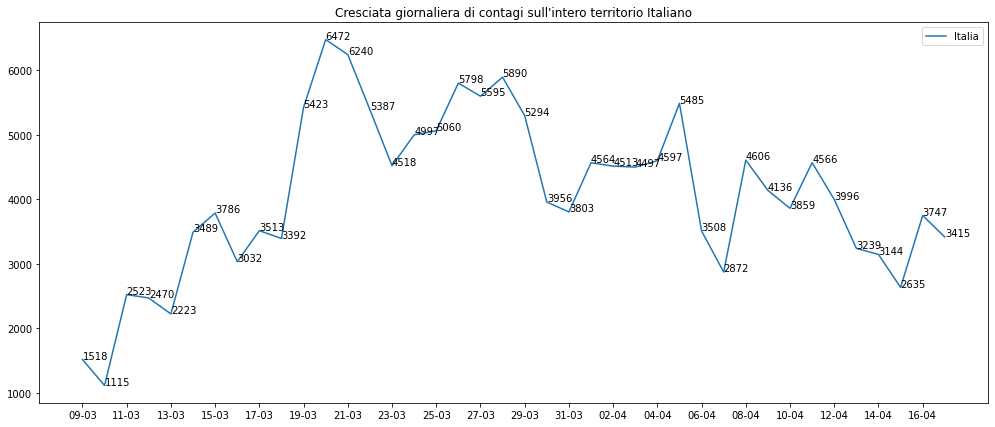

In [82]:
_ = plot_annotate(crescita_italia, 'Cresciata giornaliera di contagi sull\'intero territorio Italiano')

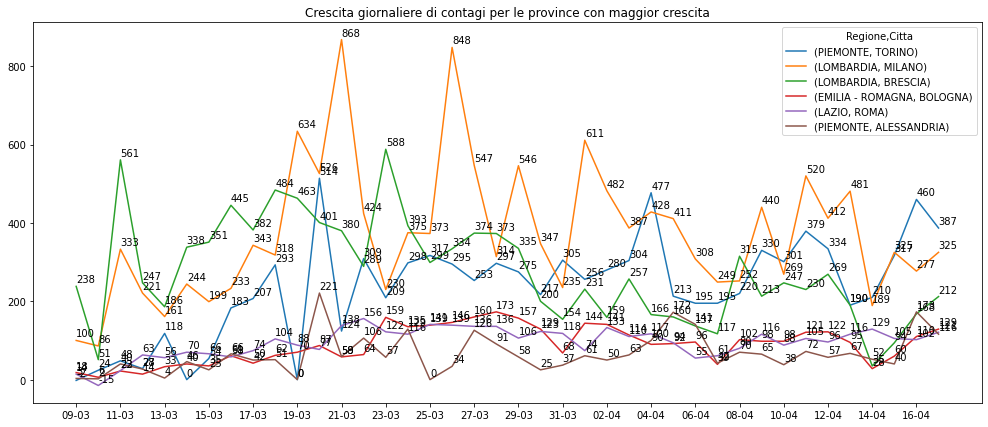

In [83]:
ax = plot_annotate(crescita.sort_values(by=crescita.columns[-1], ascending=False).head(6),
                   'Crescita giornaliere di contagi per le province con maggior crescita')
#_ = ax.set_ylim(-111,ax.get_ylim()[1])

# Average 3 days

In [0]:
avg3 = pd.DataFrame(index=crescita.sort_values(by=crescita.columns[-1], ascending=False).index)
for meno2,ieri, oggi in zip(crescita.columns[:-2], crescita.columns[1:-1], crescita.columns[2:]):
  avg3[oggi] = pd.concat([crescita[oggi], crescita[ieri], crescita[meno2]], axis=1).mean(axis=1)

In [0]:
avg3 = avg3.astype('int32')

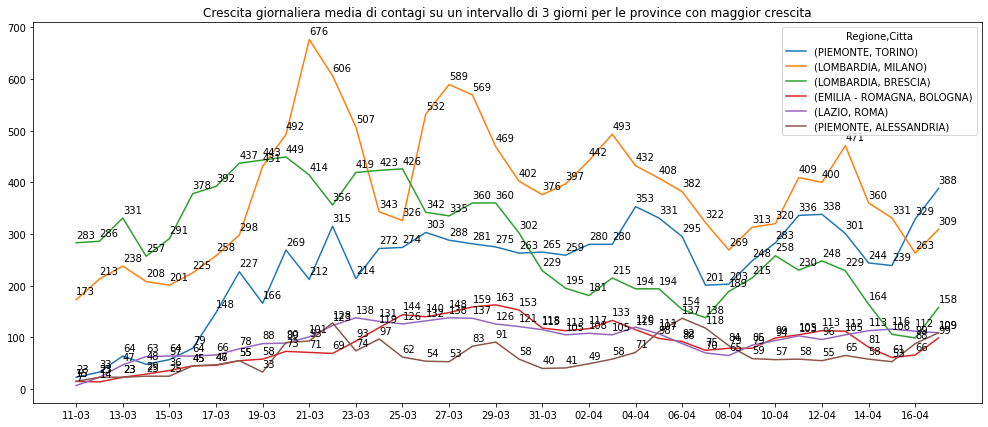

In [86]:
_ = plot_annotate(avg3.head(6), 'Crescita giornaliera media di contagi su un intervallo di 3 giorni per le province con maggior crescita')

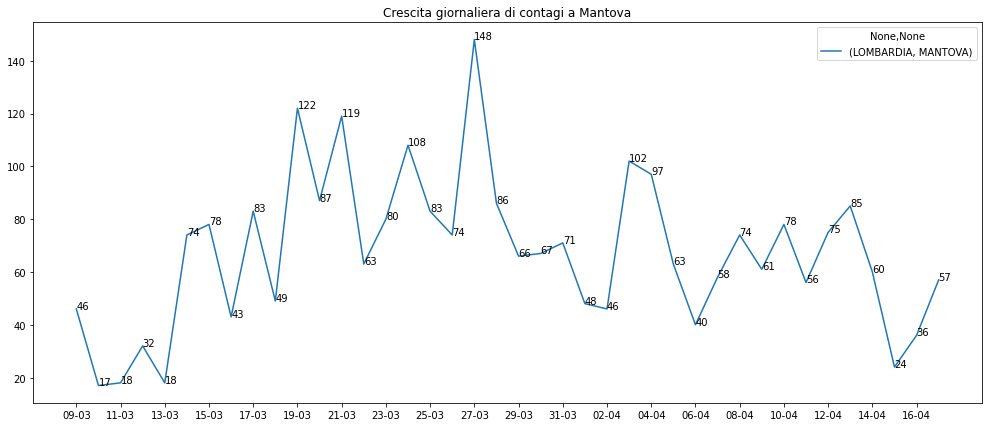

In [87]:
_ = plot_annotate(crescita.loc[('LOMBARDIA','MANTOVA')].to_frame().T, 'Crescita giornaliera di contagi a Mantova', ydelta=0)

In [0]:
regioni = sorted_by_infections.groupby('Regione').sum()
regioni = regioni.sort_values(by=[regioni.columns[-1]],ascending=False)

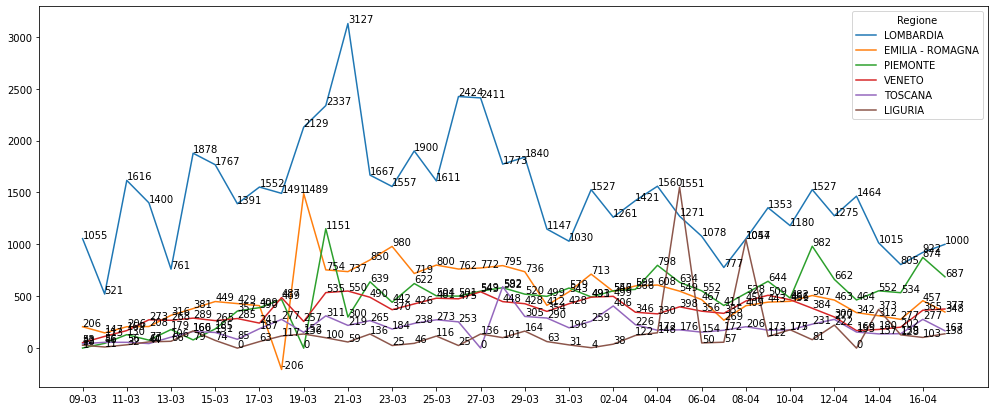

In [89]:
crescita_regioni = crescita.groupby('Regione').sum().loc[regioni.index]
_ = plot_annotate(crescita_regioni.head(6))


In [0]:
casi_italia = sorted_by_infections.sum(axis=0).to_frame().T
casi_italia.index= ['Italia']

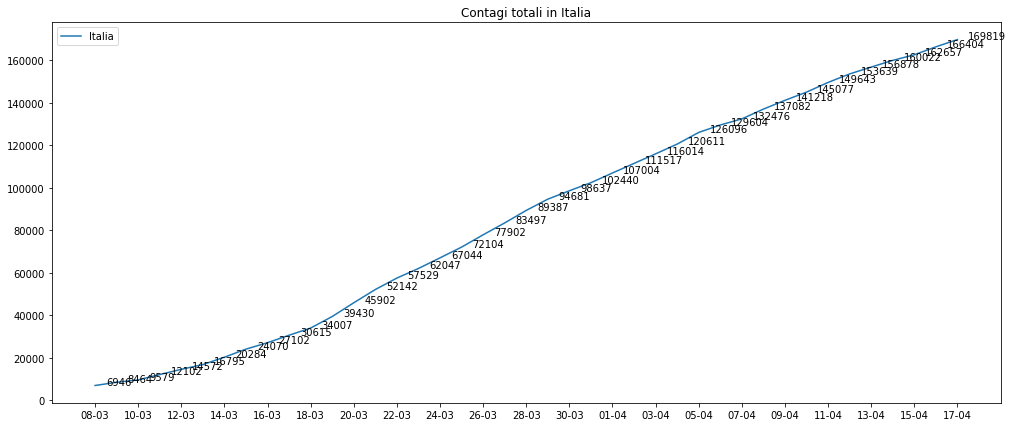

In [91]:
_ = plot_annotate(casi_italia, 'Contagi totali in Italia', xdelta=0.5)

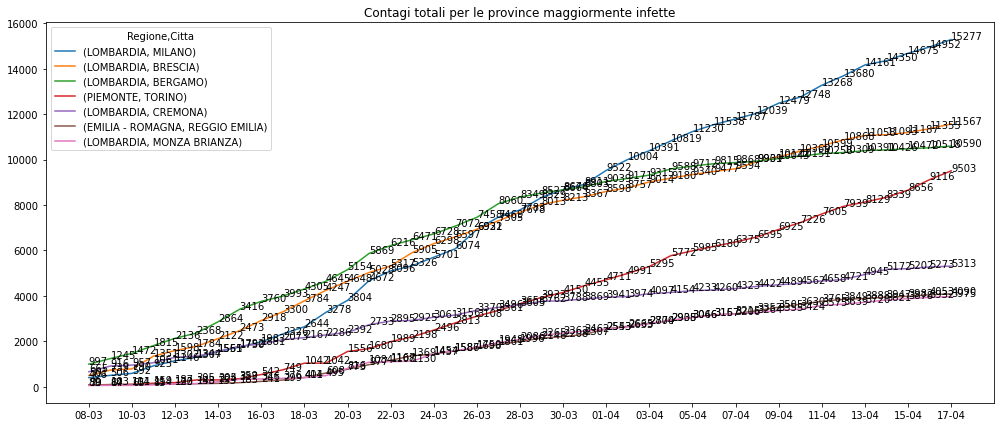

In [92]:
_ = plot_annotate(sorted_by_infections.head(7),'Contagi totali per le province maggiormente infette')

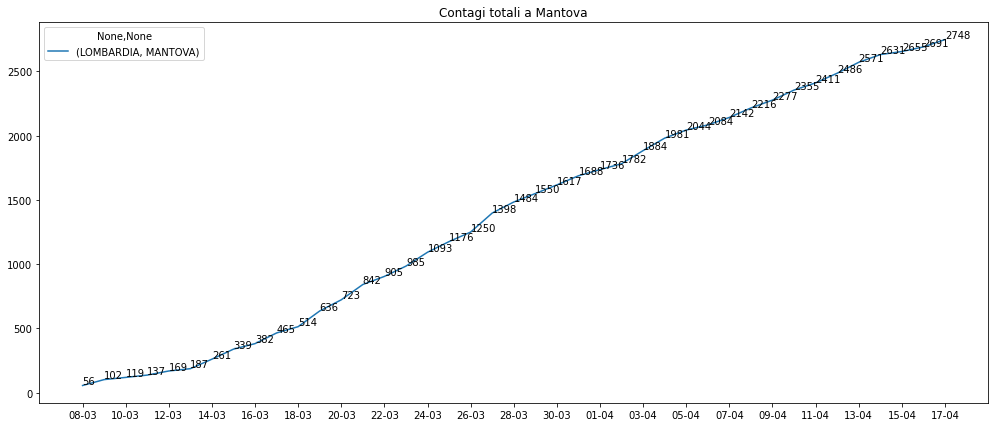

In [93]:
_ = plot_annotate(sorted_by_infections.loc[('LOMBARDIA','MANTOVA')].to_frame().T, 'Contagi totali a Mantova')

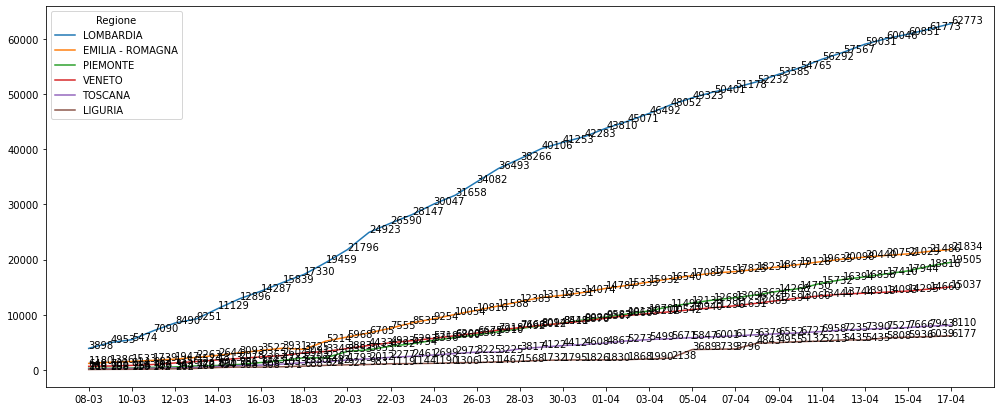

In [94]:
_ = plot_annotate(regioni.head(6))